# 1. Aussagekräftige Felder

Die wichtigsten Felder für mein Modell sind:
- `median_income`: Höheres Einkommen führt oft zu höheren Hauspreisen.
- `housing_median_age`: Ältere Gebäude können günstiger oder seltener renoviert sein.
- `latitude` und `longitude`: Die Lage hat großen Einfluss auf die Immobilienpreise.

Diese Felder zeigen klare Zusammenhänge mit dem Zielwert `median_house_value`.

# 2 Passende Messmethode

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:/BBB/2. Jahr/259/LB/archive/1553768847-housing.csv")

X = df.drop("median_house_value", axis=1).select_dtypes(include=[np.number]).dropna()
y = df.loc[X.index, "median_house_value"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R²-Score:", r2)

Mean Squared Error: 4921881237.628142
R²-Score: 0.640086568899374


Ich verwende MSE und R², weil sie bei Regressionsmodellen oft benutzt werden.
- Der MSE (Mean Squared Error) zeigt, wie stark die vorhergesagten Hauspreise im Durchschnitt vom tatsächlichen Preis abweichen – und zwar in Dollar².
- Der R²-Wert (Bestimmtheitsmaß) zeigt, wie gut mein Modell erklären kann, warum Häuser unterschiedliche Preise haben.

# 3. Wahrheitsmatrix

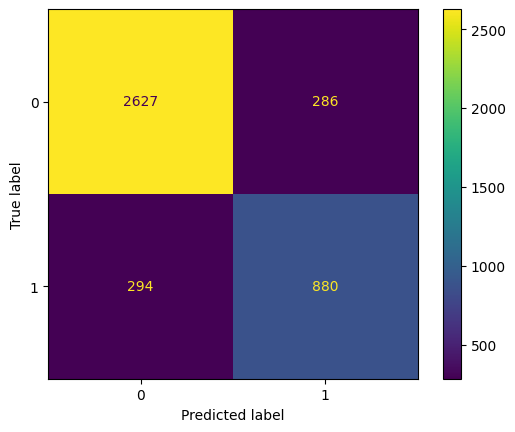

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

threshold = 250000
y_true_class = (y_test >= threshold).astype(int)
y_pred_class = (y_pred >= threshold).astype(int)

cm = confusion_matrix(y_true_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Ich habe ein Regressionsmodell verwendet, das Hauspreise als Zahlen vorhersagt.  
Um eine Confusion Matrix zu erstellen, habe ich die Vorhersagen zuerst in Klassen umgewandelt:  
Preise ab 250'000 $ gelten als "teuer" (1), darunter als "günstig" (0).
(Aus ChatGPT erklären lassen)

Die Wahrheitsmatrix zeigt, wie oft das Modell richtig oder falsch lag.  
- 2627 günstige Häuser wurden korrekt erkannt (True Negatives).  
- 880 teure Häuser wurden korrekt erkannt (True Positives).  
- 286 günstige Häuser wurden fälschlich als teuer erkannt (False Positives).  
- 294 teure Häuser wurden fälschlich als günstig erkannt (False Negatives).  

Insgesamt erkennt das Modell günstige Häuser sehr gut, teure Häuser etwas weniger gut.

In [4]:
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)  # Trefferquote bei "teuer"
specificity = tn / (tn + fp)  # Trefferquote bei "günstig"

print("Sensitivität (Recall):", sensitivity)
print("Spezifität:", specificity)

Sensitivität (Recall): 0.7495741056218058
Spezifität: 0.9018194301407484


Die Sensitivität zeigt, wie gut das Modell teure Häuser erkennt.  
Die Spezifität zeigt, wie gut günstige Häuser erkannt werden.  
Beide Werte helfen, die Klassifikationsqualität besser einzuschätzen.

# 4. Bewertung des Modells

Mein Modell funktioniert gut, aber nicht perfekt. Der R²-Wert zeigt, dass es ca. 64 % der Hauspreise gut vorhersagt.  
Die Klassifikation über 250'000 USD funktioniert ebenfalls, aber könnte mit anderen Algorithmen besser sein.  
Ich vermute, dass vor allem `median_income` stark hilft, weil Einkommen oft mit Immobilienwerten zusammenhängt.